# 01-benson Turnstile Data

## Pickle
Download the pickle (compressed size: 59MB) [from Google Drive](https://drive.google.com/file/d/1Y8tN1pdgTk9SD0lOeNj4l6sA6AI06abK/view?usp=sharing) to run the cells in this notebook.

## Setup
Imports & Configs

In [1]:
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
# MATPLOTLIB as SVG
%config InlineBackend.figure_format = 'svg'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime
import seaborn as sns
import pickle
import MtaRidership as mr

%matplotlib inline

In [4]:
# # various options in pandas
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 25)
# #pd.set_option('display.precision', 6)

In [5]:
# if you run into trouble, it's often helpful to know which version you're on
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

Pandas version: 0.23.4
Numpy version: 1.15.4


## Data Load
Load the data  
Setup a variable for the "key" index columns

In [6]:
# # Download all the turnstile files for 2018 into data (remove the echo command; left in place so for cell reruns)
# !cd data && echo curl 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_18[0-1][0-9][0-3][0-9].txt' --remote-name
# # Delete files that don't have any data in them (size 8158 bytes, or just under 16 512-byte blocks)
# !find data -size 16 -delete

In [7]:
# # Get a list of all dates in the data directory. Assumes filename format <text>_<WEEKS>.<stuff> and gets <WEEKS>
# weeks = !ls -1 data | cut -d_ -f2 | cut -d. -f1

In [8]:
# key_columns=["C/A", "UNIT", "SCP", "STATION"]

In [9]:
# Load the MTA data
# mta = mr.MtaRidership(weeks)

In [10]:
# # Save as a pickle
# import pickle
# with open('MtaRidership2018.pkl',mode='wb') as file:
#     pickle.dump(mta,file,pickle.HIGHEST_PROTOCOL)

In [11]:
# Load from a pickle
def load_pickle(pickle_file):
    with open(pickle_file,mode='rb') as file:
        return pickle.load(file)

In [13]:
!gunzip MtaRidership2018.pkl.gz
mta = load_pickle('data/MtaRidership2018.pkl')
!gzip MtaRidership2018.pkl

In [14]:
mta.cleanup()

## Basic Data Check

In [15]:
mta.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8331968 entries, 8 to 201173
Data columns (total 11 columns):
C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES     int64
EXITS       int64
dtypes: int64(2), object(9)
memory usage: 762.8+ MB


In [16]:
mta.df.describe()

,ENTRIES,EXITS
count,8.331968e+06,8.331968e+06
mean,3.920902e+07,3.211989e+07
std,2.047122e+08,1.891823e+08
min,0.000000e+00,0.000000e+00
25%,4.759500e+05,2.295170e+05
50%,2.481337e+06,1.395792e+06
75%,6.859103e+06,4.779626e+06
max,2.130153e+09,2.096934e+09


In [17]:
mta.df.DESC.value_counts()

REGULAR    8331968
Name: DESC, dtype: int64

In [18]:
mta.df.STATION.value_counts()

FULTON ST          178637
34 ST-PENN STA     156636
23 ST              109717
GRD CNTRL-42 ST    105846
CANAL ST           101309
CHAMBERS ST         96952
42 ST-PORT AUTH     95820
ATL AV-BARCLAY      92200
PATH NEW WTC        88822
86 ST               87531
WALL ST             85491
34 ST-HERALD SQ     85177
TIMES SQ-42 ST      83764
CORTLANDT ST        78980
59 ST COLUMBUS      75103
125 ST              74632
59 ST               72286
47-50 STS ROCK      70508
14 ST               69735
JAY ST-METROTEC     68838
CHURCH AV           67869
METS-WILLETS PT     66618
161/YANKEE STAD     66300
96 ST               65454
50 ST               64510
14 ST-UNION SQ      64296
LEXINGTON AV/53     56488
28 ST               51827
FLUSHING-MAIN       51017
ST. GEORGE          49954
                    ...  
YORK ST              5299
BOWERY               5273
190 ST               5271
NEW LOTS             5269
HEWES ST             5264
138/GRAND CONC       5227
SHEPHERD AV          5188
RIT-MANHATTA

# Cleanup

## Columns
- Remove extra space in column names
- Add DATE_TIME column as datetime64

In [19]:
mta.df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [20]:
# mta.format_columns()

In [21]:
# mta.df.columns

In [22]:
# mta.df.info()

## Check uniqueness of "station" & DATE_TIME

In [23]:
# # Sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
# sanity_df = (mta.turnstiles_df.groupby(key_columns +["DATE_TIME"])  
#  .ENTRIES.count()
#  .reset_index()  # or use as_index = False; otherwise makes groupby columns new index 
#  .sort_values("ENTRIES", ascending=False))

In [24]:
# mask=((mta.turnstiles_df['C/A']=='C010') & 
#      (mta.turnstiles_df.UNIT=='R231') &
#      (mta.turnstiles_df.SCP=='00-00-00') &
#      (mta.turnstiles_df.STATION=='UNION ST') & 
#      (mta.turnstiles_df.DATE_TIME>datetime.datetime(2018,2,19,23,0,0)) &
#      (mta.turnstiles_df.DATE_TIME<datetime.datetime(2018,2,22,23,0,0)))
# mta.turnstiles_df[mask]

In [25]:
# # N311	R339	01-00-01	36 ST
# mask=((mta.turnstiles_df['C/A']=='N311') & 
#      (mta.turnstiles_df.UNIT=='R339') &
#      (mta.turnstiles_df.SCP=='01-00-01') &
#      (mta.turnstiles_df.STATION=='36 ST') & 
#      (mta.turnstiles_df.DATE_TIME>datetime.datetime(2018,12,8,16,0,0)) &
#      (mta.turnstiles_df.DATE_TIME<datetime.datetime(2018,12,11,16,0,0)))
# mta.turnstiles_df[mask]

### Analysis
- The `RECOVR AUD` seems to have bad data when it duplicates a time.
- When it doesn't duplicate a time it sometimes has valid data.

### Conclusion
- Drop all RECOVR AUD entries

### Drop `RECOVR AUD` rows

In [26]:
# mta.dropRowsByColValue('DESC','RECOVR AUD')

## Remove stations

### List of stations to drop

In [27]:
# exclude_stations=['34 ST-PENN STA', 'GRD CNTRL-42 ST', '42 ST-PORT AUTH','PATH NEW WTC']

### Loop through list of stations to drop calling our drop function

In [28]:
# for drop_me in exclude_stations:
#     continue
#     mta.dropRowsByColValue('STATION',drop_me)

## Group by Day

### New DF
- Grouped by index columns & DATE
- Look at ENTRIES column
- Take the first row of this column
- Reset the index back to a row number

In [29]:
# mta.turnstiles_daily = mta.turnstiles_df.groupby(key_columns+["DATE"]).ENTRIES.first().reset_index()

### RAW_DAILY_ENTRIES
- Group the data by station, then within each group:
    - For the ENTRIES column, subtract the current value from the value in the row above
- The first row gets NaN since there is no previous row

In [30]:
# mta.turnstiles_daily['RAW_DAILY_ENTRIES'] = mta.turnstiles_daily.groupby(key_columns).ENTRIES.diff()

### Drop the rows in each group with no count (NaN)

In [31]:
# mta.turnstiles_daily.dropna(subset=["RAW_DAILY_ENTRIES"], axis=0, inplace=True)

### Convert the count back to an integer

In [32]:
# mta.turnstiles_daily=mta.turnstiles_daily.astype({'RAW_DAILY_ENTRIES':np.int64},copy=False)

## DAILY_ENTRIES

### Take the absolute value

In [33]:
# mta.turnstiles_daily['DAILY_ENTRIES'] = np.abs(mta.turnstiles_daily.RAW_DAILY_ENTRIES)

### Does count exceed 2 riders/second?

In [34]:
# mta.turnstiles_daily[mta.turnstiles_daily.DAILY_ENTRIES>24*60*60*2].count()

### Set counts that are too high to 0

In [35]:
# mta.turnstiles_daily.loc[mta.turnstiles_daily.DAILY_ENTRIES>24*60*60*2,'DAILY_ENTRIES']=0

# Display

In [36]:
mta.n_largest(10)

,DAILY_ENTRIES
STATION,
34 ST-PENN STA,51748156
GRD CNTRL-42 ST,45601551
34 ST-HERALD SQ,39632236
23 ST,35153517
14 ST-UNION SQ,33493550
42 ST-PORT AUTH,32686594
TIMES SQ-42 ST,32569366
FULTON ST,31838257
86 ST,25762313


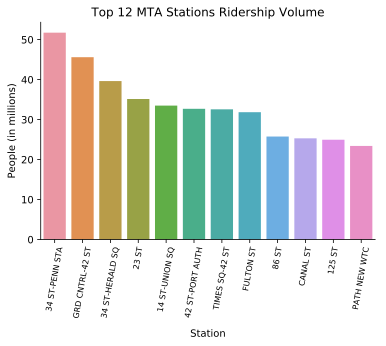

In [39]:
f = mta.getMvp(12)
plt.show()
#plt.savefig('test.svg',dpi=300)

In [40]:
mta.daily.DAILY_ENTRIES.sum()

1885904142

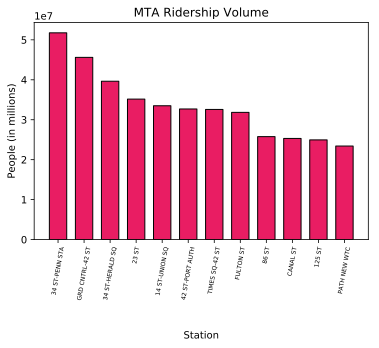

In [42]:
top_ten = mta.n_largest(12)
top_ten_indexed = top_ten.reset_index()

# fig = sns.barplot(x=top_ten_indexed['STATION'], y=top_ten_indexed['DAILY_ENTRIES'])
# sns.despine()

width = 1/1.5
height = 5
y=top_ten_indexed['DAILY_ENTRIES']
x=top_ten_indexed['STATION']

plt.bar(x, y, width, height, color = '#e91d63', edgecolor='black')
plt.ylabel("People (in millions)", fontsize=10,)
plt.xlabel("Station", fontsize=10, labelpad=30)
plt.title("MTA Ridership Volume")
plt.xticks(fontsize= 6, rotation=80);

In [43]:
mta.daily['MONTH','DAY','YEAR'] = mta.daily.DATE.apply(lambda x: x.split('/'))

In [44]:
mta.daily.columns

Index([                   'C/A',                   'UNIT',
                          'SCP',                'STATION',
                         'DATE',                'ENTRIES',
            'RAW_DAILY_ENTRIES',          'DAILY_ENTRIES',
       ('MONTH', 'DAY', 'YEAR')],
      dtype='object')

In [45]:
def WeekDay(datestring):
    # 0 is Saturday, 1 is Sunday
    # Algorithm from http://people.albion.edu/imacinnes/calendar/Day_of_the_Week.html
    month,day,year=datestring.split('/')
    month=int(month)
    day=int(day)
    year=int(year)

    MDS = (year-1)*365 + (year-1)//4 + (month-1)*30+(day-11)
    COR = (year-1)//100 - 16
    if COR > 0:
        MDS = MDS-COR
    CO = (year-1)//400 - 4
    if CO>0:
        MDS = MDS+CO
    
    for x in range(1,month):
        if x==1: MDS += 1
        if x==3: MDS += 1
        if x==5: MDS += 1
        if x==7: MDS += 1
        if x==8: MDS += 1
        if x==10: MDS += 1
        if x==12: MDS += 1
        if x==2: MDS -= 2
    return MDS%7

In [46]:
mta.daily['WEEKDAY'] = mta.daily.DATE.apply(lambda x: WeekDay(x))

In [47]:
mta.daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,RAW_DAILY_ENTRIES,DAILY_ENTRIES,"(MONTH, DAY, YEAR)",WEEKDAY
1,A002,R051,02-00-00,59 ST,01/04/2018,6467977,1396,1396,"[01, 04, 2018]",5
2,A002,R051,02-00-00,59 ST,01/05/2018,6468825,848,848,"[01, 05, 2018]",6
3,A002,R051,02-00-00,59 ST,01/07/2018,6470884,2059,2059,"[01, 07, 2018]",1
4,A002,R051,02-00-00,59 ST,01/10/2018,6474452,3568,3568,"[01, 10, 2018]",4
5,A002,R051,02-00-00,59 ST,01/11/2018,6475796,1344,1344,"[01, 11, 2018]",5
6,A002,R051,02-00-00,59 ST,01/12/2018,6477492,1696,1696,"[01, 12, 2018]",6
7,A002,R051,02-00-00,59 ST,01/14/2018,6479577,2085,2085,"[01, 14, 2018]",1
8,A002,R051,02-00-00,59 ST,01/17/2018,6482542,2965,2965,"[01, 17, 2018]",4
9,A002,R051,02-00-00,59 ST,01/18/2018,6483838,1296,1296,"[01, 18, 2018]",5
10,A002,R051,02-00-00,59 ST,01/19/2018,6485428,1590,1590,"[01, 19, 2018]",6


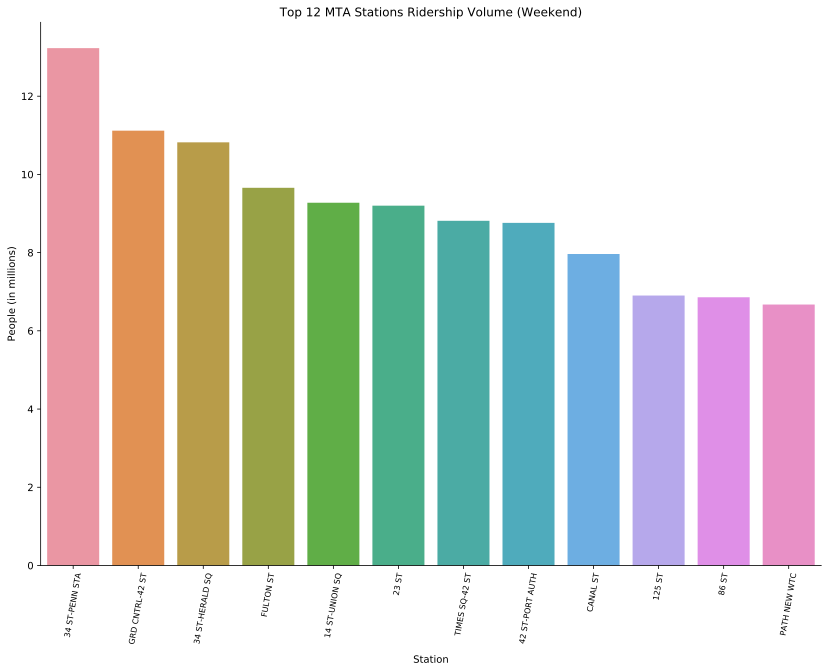

In [48]:
weekends = mta.daily[mta.daily.WEEKDAY<2]
weekend = mr.MtaRidership()
weekend.daily = weekends
top_N = weekend.n_largest(12)
top_N = top_N.div(1000000)
top_ten_indexed = top_N.reset_index()
plt.figure(figsize=(14,10))
fig = sns.barplot(x=top_ten_indexed['STATION'], y=top_ten_indexed['DAILY_ENTRIES'])
sns.despine()

plt.ylabel("People (in millions)", fontsize=10)
plt.xlabel("Station", fontsize=10, labelpad=10)
plt.title("Top 12 MTA Stations Ridership Volume (Weekend)")
plt.xticks(fontsize = 8, rotation=80)
#plt.savefig('chplot.png', dpi=300)
plt.show();

In [49]:
top = mta.n_largest(12)
#stations = list(top.reset_index().average()iloc[0:,1])
mta.n_largest(12).div(365)

,DAILY_ENTRIES
STATION,
34 ST-PENN STA,141775.769863
GRD CNTRL-42 ST,124935.756164
34 ST-HERALD SQ,108581.468493
23 ST,96311.005479
14 ST-UNION SQ,91763.150685
42 ST-PORT AUTH,89552.312329
TIMES SQ-42 ST,89231.139726
FULTON ST,87228.101370
86 ST,70581.679452


In [50]:
mta.daily[mta.daily.WEEKDAY>1].groupby('WEEKDAY').mean()[['DAILY_ENTRIES']]

,DAILY_ENTRIES
WEEKDAY,
2,590.010524
3,1184.762686
4,1296.697445
5,1295.294193
6,1307.549482


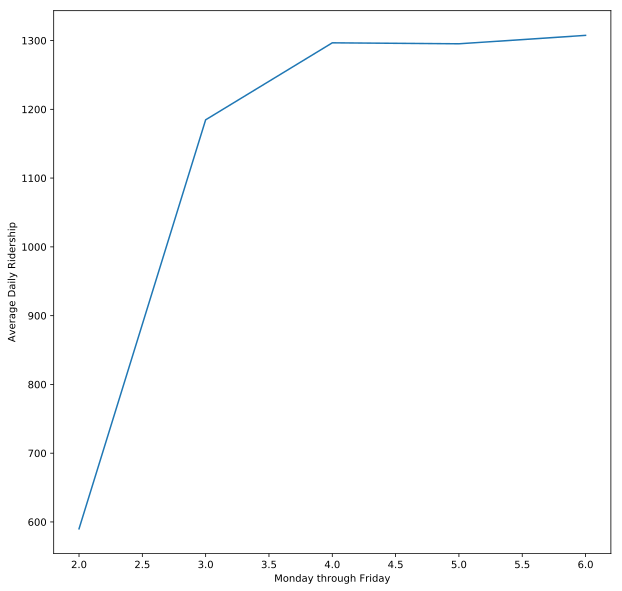

In [51]:
plt.figure(figsize=(10,10))
plt.plot(range(2,7),mta.daily[mta.daily.WEEKDAY>1].groupby('WEEKDAY').mean().DAILY_ENTRIES)
plt.xlabel('Monday through Friday')
plt.ylabel('Average Daily Ridership')
#sns.pairplot(mta.daily[mta.daily.WEEKDAY>1]);
#plt.savefig('AvererageDailyRidership.png',dpi=150)